In [1]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

In [2]:
# Definiton of the function that creates the data set.
def genDataSet(N, seed):
    # Reset PN generator.
    np.random.seed(seed)
    # Attribute.
    x = np.linspace(-6, 6, N).reshape(N, 1)
    # Fifth order target function.
    y = 2.33*x**5 + 5.3*x**4 - 3.2*x**3 + 0.5*x**2 - x + 2
    # Noise.
    w = np.random.randn(N, 1)
    # Observable function.
    y_noisy = y + w
    # Return arrays.
    return x, y_noisy, y

In [3]:
# Define number of samples.
N = 100000

# Reset pseudo random generator.
seed = 0

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

In [4]:
kfold_mean_vec = []
kfold_std_vec = []
idx = 0
splits = [2, 5, 10]
for k in splits:
    
    kfold_mean_vec.append([])
    kfold_std_vec.append([])
    
    for seedvar in range(0, 500):
        # Instantiate the k-Fold object.
        kfold = KFold(n_splits=k, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        # Calculate the cross-validation score with kfold object.
        # OBS.: All scorer objects follow the convention that higher return values are better than lower return values. 
        #       Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, 
        #       are available as neg_mean_squared_error which return the negated value of the metric.
        lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)

        scores = -lin_scores
        kfold_mean_vec[idx].append(scores.mean())
        kfold_std_vec[idx].append(scores.std())
    idx += 1

k = 2: MSE mean: 9.9476e-01 - MSE var: 9.8621e-09
k = 5: MSE mean: 9.9472e-01 - MSE var: 1.4720e-09
k = 10: MSE mean: 9.9471e-01 - MSE var: 5.4453e-10


k = 2: STD DEV mean: 3.6710e-03 - STD DEV var:7.4821e-06
k = 5: STD DEV mean: 8.6569e-03 - STD DEV var:8.8745e-06
k = 10: STD DEV mean: 1.3067e-02 - STD DEV var:1.0125e-05


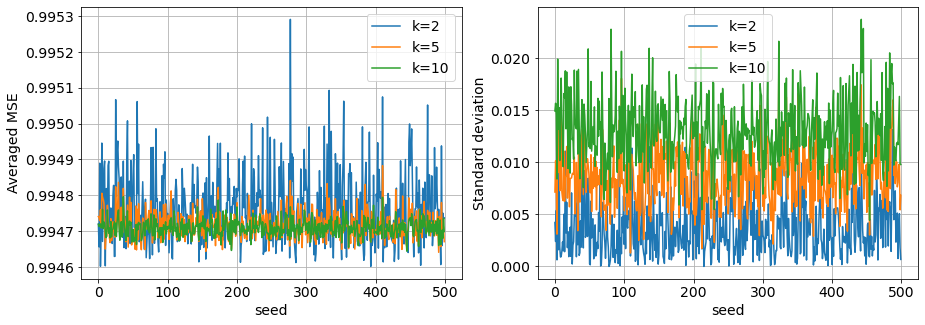

In [7]:
plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1)
for k in range(0,len(splits)):
    plt.plot(kfold_mean_vec[k], label='k='+str(splits[k]))
    print('k = %d: MSE mean: %1.4e - MSE var: %1.4e' % (splits[k], np.mean(kfold_mean_vec[k]), np.var(kfold_mean_vec[k])))
plt.ylabel('Averaged MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

print('\n')
ax = plt.subplot(1, 2, 2)
for k in range(0,len(splits)):
    plt.plot(kfold_std_vec[k], label='k='+str(splits[k]))
    print('k = %d: STD DEV mean: %1.4e - STD DEV var:%1.4e' % (splits[k], np.mean(kfold_std_vec[k]), np.var(kfold_std_vec[k])))
plt.ylabel('Standard deviation', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()